### Import and basic data cleaning

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("assets/race-result.csv")

In [11]:
df.head()

,Noah,Liam,Henry,Erik,Mateo,Lucas,Emma,James,Isabella,Mia,Lily
0,1:01.392,59.031,57.752,1:03.008,1:04.309,1:05.995,1:11.991,1:11.978,1:13.978,1:17.886,1:14.160
1,55.895,56.212,56.993,58.261,58.512,59.848,1:08.514,1:09.611,1:09.741,1:15.597,1:13.190
2,56.456,56.719,57.864,58.155,58.102,1:00.701,1:07.264,1:09.015,1:10.318,1:21.403,1:12.006
3,57.772,57.521,58.475,57.293,1:00.251,59.283,1:08.405,1:08.807,1:13.304,2:00.252,1:18.371
4,56.836,56.81,1:02.250,59.794,1:04.450,1:01.634,1:09.585,1:14.920,1:16.562,1:19.296,1:19.689


In [3]:
for idx, row in enumerate(df.iterrows()):
    for key, elem in enumerate(df.iloc[idx]):
        if (type(elem)!= float) and (":" in elem):
            df.iloc[idx, key] = int(elem.split(":")[0]) * 60 + float(elem.split(":")[-1])

In [4]:
df = df.astype(float, copy=None, errors='raise')

In [14]:
df.head()

,Noah,Liam,Henry,Erik,Mateo,Lucas,Emma,James,Isabella,Mia,Lily
0,61.392,59.031,57.752,63.008,64.309,65.995,71.991,71.978,73.978,77.886,74.160
1,55.895,56.212,56.993,58.261,58.512,59.848,68.514,69.611,69.741,75.597,73.190
2,56.456,56.719,57.864,58.155,58.102,60.701,67.264,69.015,70.318,81.403,72.006
3,57.772,57.521,58.475,57.293,60.251,59.283,68.405,68.807,73.304,120.252,78.371
4,56.836,56.810,62.250,59.794,64.450,61.634,69.585,74.920,76.562,79.296,79.689


### Basic Exploration

In [15]:
df.columns

Index(['Noah', 'Liam', 'Henry', 'Erik', 'Mateo', 'Lucas', 'Emma', 'James',
       'Isabella', 'Mia', 'Lily'],
      dtype='object')

In [16]:
for driver in df.columns:
    print(driver, df[driver].mean())

Noah 55.95022857142857
Liam 56.53534285714286
Henry 58.150363636363636
Erik 59.19854545454545
Mateo 59.24848484848485
Lucas 60.845625000000005
Emma 69.13858620689655
James 70.67185714285714
Isabella 72.19044444444445
Mia 86.04269565217392
Lily 77.42399999999999


Matplotlib is building the font cache; this may take a moment.


<Axes: xlabel='laps [ ]', ylabel='time [min]'>

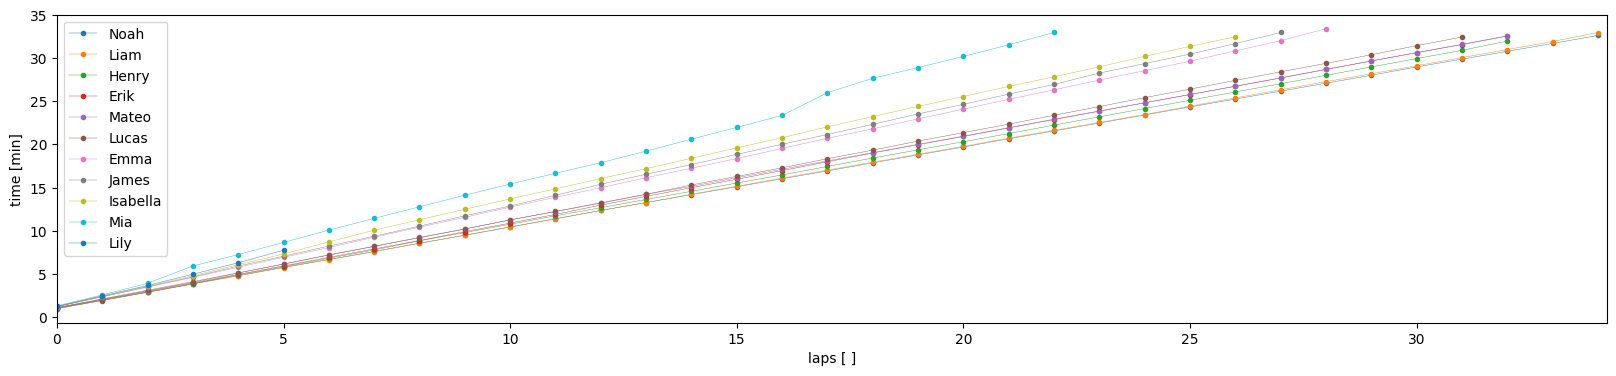

In [5]:
(df.cumsum()/60).plot(
    figsize=(20, 4),
    xlim=(0, 34.2),
    xlabel="laps [ ]",
    ylabel="time [min]",
    style=".-",
    linewidth=0.3
)

<Axes: xlabel='lap [ ]', ylabel='time [min]'>

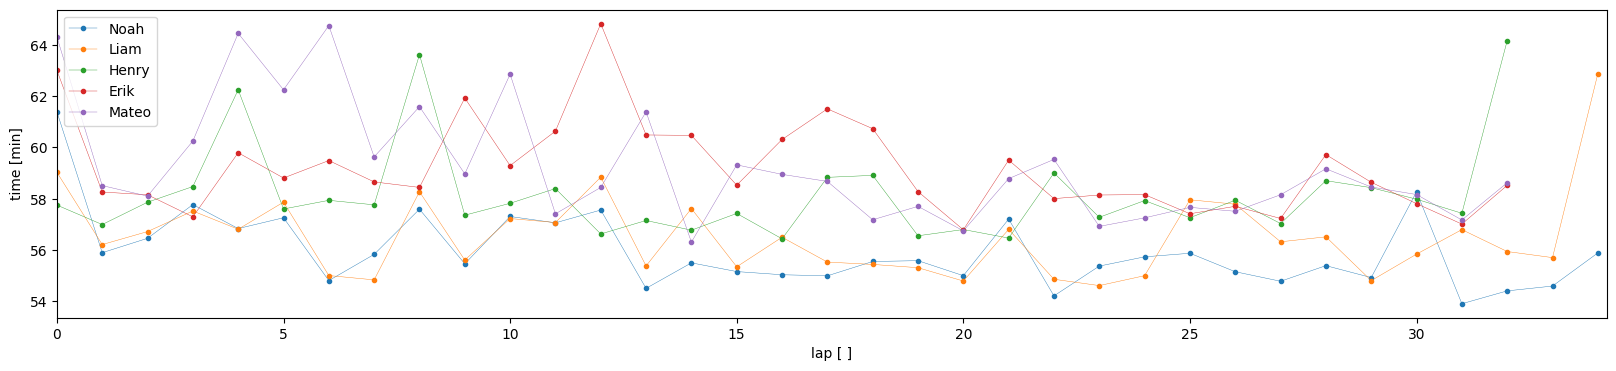

In [6]:
# limit to people driving sub 60 laps on average
sub60 = ["Noah", "Liam", "Henry", "Erik", "Mateo"]
df[sub60].plot(
    figsize=(20, 4),
    xlim=(0, 34.2),
    xlabel="lap [ ]",
    ylabel="time [min]",
    style=".-",
    linewidth=0.3)

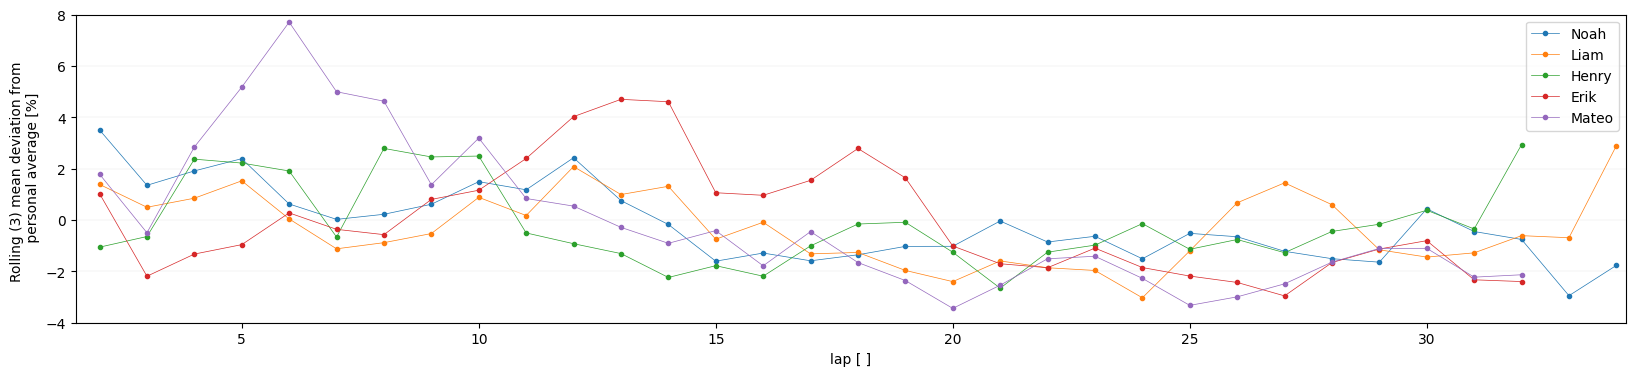

In [37]:
ax = (((df[sub60]/df[sub60].mean())-1)*100).rolling(3).mean().plot(
    figsize=(20, 4),
    xlim=(1.5, 34.2),
    ylim=(-4, 8),
    xlabel="lap [ ]",
    ylabel="Rolling (3) mean deviation from \n personal average [%]",
    style=".-",
    linewidth=0.5,

)
ax.grid(axis='y', linestyle='-', linewidth=0.2, alpha=0.5)

<Axes: xlabel='lap [ ]', ylabel='time [min]'>

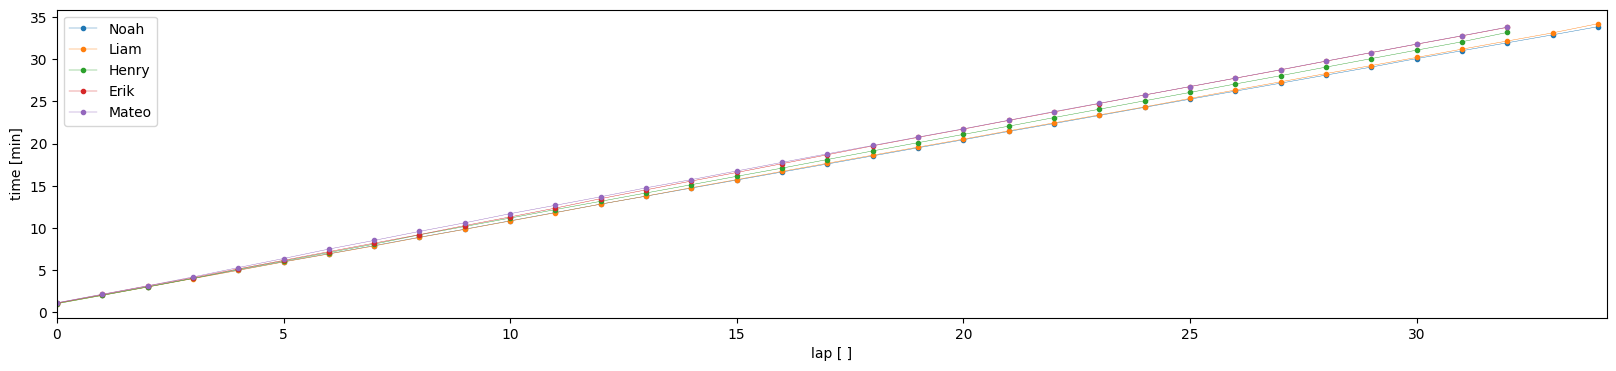

In [20]:
(df[sub60]/(df[sub60].mean().mean())).cumsum().plot(
    figsize=(20, 4),
    xlim=(0, 34.2),
    xlabel="lap [ ]",
    ylabel="time [min]",
    style=".-",
    linewidth=0.3)

<Axes: xlabel='lap [ ]', ylabel='laptime relative to average [%]'>

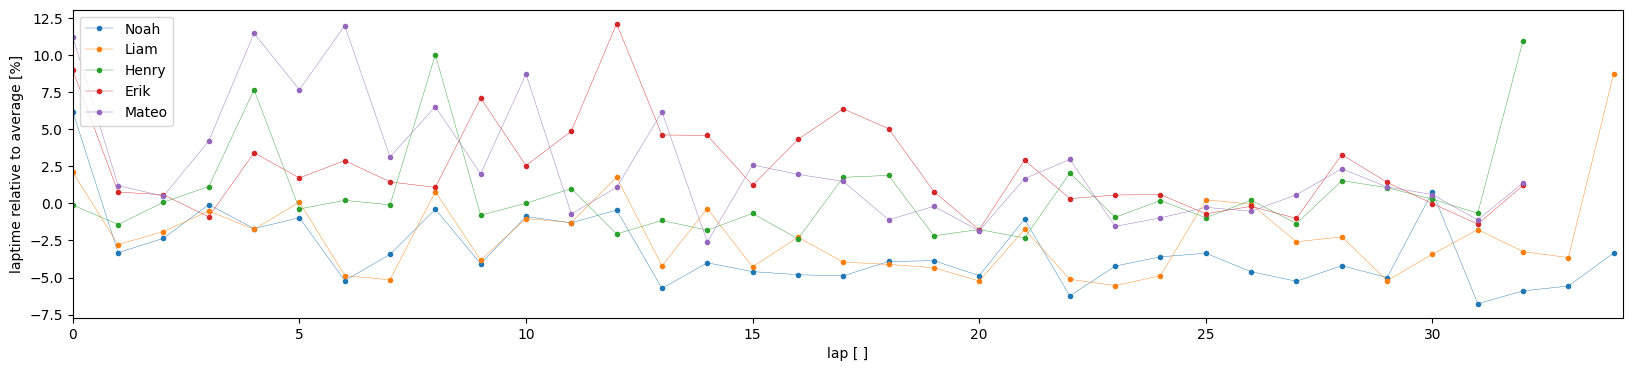

In [21]:
(((df[sub60]/df[sub60].mean().mean())-1)*100).plot(
    figsize=(20, 4),
    xlim=(0, 34.2),
    xlabel="lap [ ]",
    ylabel="laptime relative to average [%]",
    style=".-",
    linewidth=0.3
)

#### Trying out interpolation

In [22]:
ed = df["Liam"]
ed.head()

0    59.031
1    56.212
2    56.719
3    57.521
4    56.810
Name: Liam, dtype: float64

In [23]:
edt = (pd.DataFrame([ed.index, ed]).T).rename(columns={0:"Lap", 1:"Erik"})
edt.head()

,Lap,Erik
0,0.0,59.031
1,1.0,56.212
2,2.0,56.719
3,3.0,57.521
4,4.0,56.810


<Axes: >

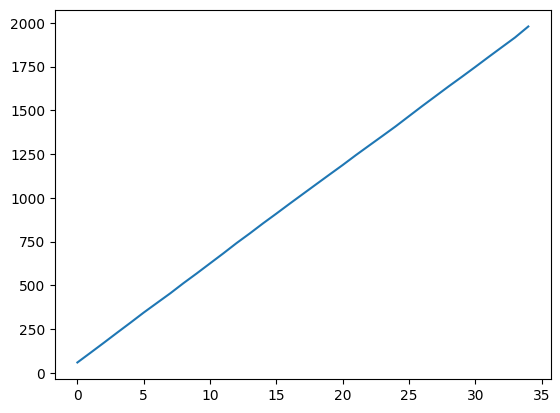

In [24]:
ed.cumsum().plot()

In [25]:
new_vals = []
for val in ed.cumsum():
    new_vals.extend([val, np.nan, np.nan, np.nan, np.nan])
new_ser = pd.Series(new_vals)

In [26]:
iser = new_ser.interpolate(limit=4)

In [27]:
iser.head()

0     59.0310
1     70.2734
2     81.5158
3     92.7582
4    104.0006
dtype: float64

### Make it "real" timeseries

In [76]:
df.head()


,Noah,Liam,Henry,Erik,Mateo,Lucas,Emma,James,Isabella,Mia,Lily
0,61.392,59.031,57.752,63.008,64.309,65.995,71.991,71.978,73.978,77.886,74.160
1,55.895,56.212,56.993,58.261,58.512,59.848,68.514,69.611,69.741,75.597,73.190
2,56.456,56.719,57.864,58.155,58.102,60.701,67.264,69.015,70.318,81.403,72.006
3,57.772,57.521,58.475,57.293,60.251,59.283,68.405,68.807,73.304,120.252,78.371
4,56.836,56.810,62.250,59.794,64.450,61.634,69.585,74.920,76.562,79.296,79.689


In [77]:
events = []

for idx, row in enumerate(df.cumsum().iterrows()):
    for key, elem in enumerate(df.cumsum().iloc[idx]):
        events.append(
            {
                "id": df.columns[key],
                "ts": elem
            }
        )
events.sort(key=lambda x: x["ts"])

In [78]:
tsf = pd.DataFrame(events).dropna()
tsf.head()

,id,ts
0,Henry,57.752
1,Liam,59.031
2,Noah,61.392
3,Erik,63.008
4,Mateo,64.309


In [79]:
for driver in tsf.groupby("id")["id"].first():
    tsf = pd.concat([tsf, pd.DataFrame({"id": [driver], "ts": [0]})], ignore_index=True)
tsf.sort_values(by="ts", inplace=True)
tsf.head()

,id,ts
324,Noah,0.0
322,Mateo,0.0
321,Lucas,0.0
320,Lily,0.0
319,Liam,0.0


In [80]:
tsf.to_csv("assets/results-ts.csv", index=False)

In [49]:
tsf.head()

,id,ts
0,Henry,57.752
1,Liam,59.031
2,Noah,61.392
3,Erik,63.008
4,Mateo,64.309


In [67]:
for driver in tsf.groupby("id")["id"].first():
    tsf = pd.concat([tsf, pd.DataFrame({"id": [driver], "ts": [0]})], ignore_index=True)

In [68]:
tsf.head()

,id,ts
0,Henry,57.752
1,Liam,59.031
2,Noah,61.392
3,Erik,63.008
4,Mateo,64.309


In [32]:
_# this is the count of laps
tsf.groupby("id").count().sort_values("ts", ascending=False).rename(columns={"ts": "laps"})

,laps
id,
Liam,35
Noah,35
Erik,33
Henry,33
Mateo,33
Lucas,32
Emma,29
James,28
Isabella,27
